In [1]:
import os
import os.path as osp
import sys
from glob import glob
import pandas as pd
from utils import get_refcoco_df, display_target

from configuration import Config
config = Config()

In [2]:
retr_path = osp.abspath(osp.join(os.getcwd(), os.pardir, 'retr'))
sys.path.append(
    retr_path
)

In [3]:
refcoco_df = get_refcoco_df(config.ref_dir)

In [4]:
ann_dir = osp.join(config.project_path, 'generated/compiled_annotations')
fig_location = osp.join(config.project_path, 'generated/figures')
if not osp.isdir(fig_location):
    os.mkdir(fig_location)

files = sorted(glob(f'{ann_dir}/**'))

In [5]:
all_dfs = {}
for path in files: 
    df = pd.read_csv(path, index_col=0)
    ann_ids = pd.unique(df.ann_id)
    name = osp.split(path)[-1].replace('.csv', '')
    all_dfs[name] = df[['ann_id', 'expression', 'majority_annotation']]

In [6]:
full_df = list(all_dfs.values())[0].drop(columns=['majority_annotation'])
system_annotations = [all_dfs[k].majority_annotation.rename(k.replace('refcoco_testb_', '')) for k in all_dfs.keys()]

for series in system_annotations:
    full_df[series.name] = series

In [7]:
ann_id_selection = [1820214, 1119170, 1137907, 2054005]

ann_id: 1820214


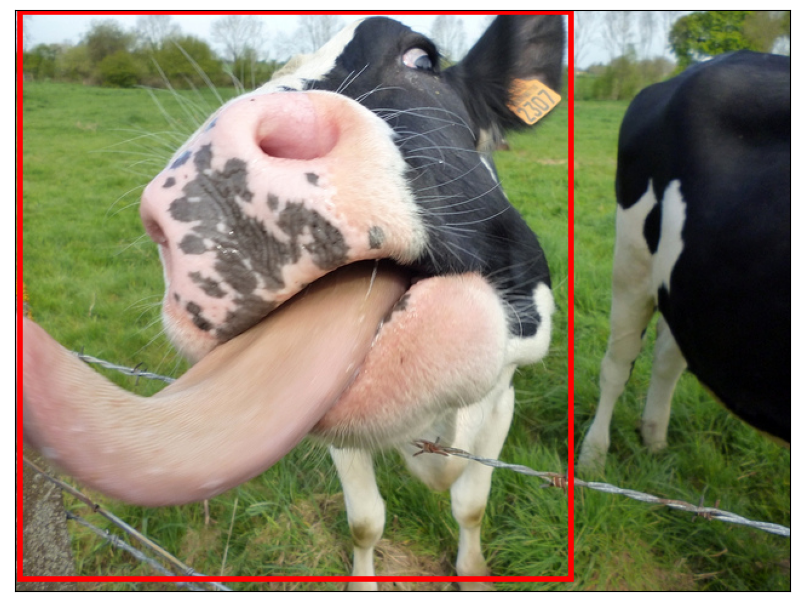

refcoco_testb_clpgpt_global_noise:0-0:        white cow (A)
refcoco_testb_clpgpt_global_noise:0-5:        left cow (A)
refcoco_testb_clpgpt_global_noise:1-0:        cow on left (A)
------------------------------------------------------------
refcoco_testb_clpgpt_nocontext_noise:0-0:     left bird (F)
refcoco_testb_clpgpt_nocontext_noise:0-5:     left giraffe (F)
refcoco_testb_clpgpt_nocontext_noise:1-0:     left guy (F)
------------------------------------------------------------
refcoco_testb_clpgpt_scene_noise:0-0:         cow on left (A)
refcoco_testb_clpgpt_scene_noise:0-5:         cow on left (A)
refcoco_testb_clpgpt_scene_noise:1-0:         cow on left (A)
------------------------------------------------------------
refcoco_testb_human_global_noise:0-0:         cow (A)
------------------------------------------------------------
refcoco_testb_trf_global_noise:0-0:           left cow (A)
refcoco_testb_trf_global_noise:0-5:           cow on left (A)
refcoco_testb_trf_global_noise:1

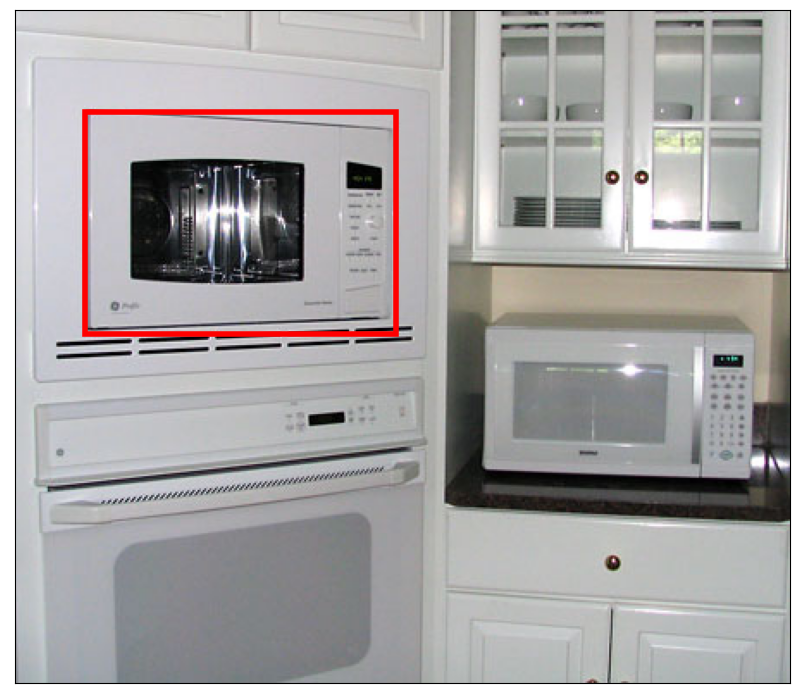

refcoco_testb_clpgpt_global_noise:0-0:        top microwave (A)
refcoco_testb_clpgpt_global_noise:0-5:        left microwave (A)
refcoco_testb_clpgpt_global_noise:1-0:        left umbrella (F)
------------------------------------------------------------
refcoco_testb_clpgpt_nocontext_noise:0-0:     left one (O)
refcoco_testb_clpgpt_nocontext_noise:0-5:     left clock (F)
refcoco_testb_clpgpt_nocontext_noise:1-0:     top left donut (F)
------------------------------------------------------------
refcoco_testb_clpgpt_scene_noise:0-0:         left stove (F)
refcoco_testb_clpgpt_scene_noise:0-5:         stove top (F)
refcoco_testb_clpgpt_scene_noise:1-0:         top left stove (F)
------------------------------------------------------------
refcoco_testb_human_global_noise:0-0:         top left microwave (A)
------------------------------------------------------------
refcoco_testb_trf_global_noise:0-0:           top left microwave (A)
refcoco_testb_trf_global_noise:0-5:           top micr

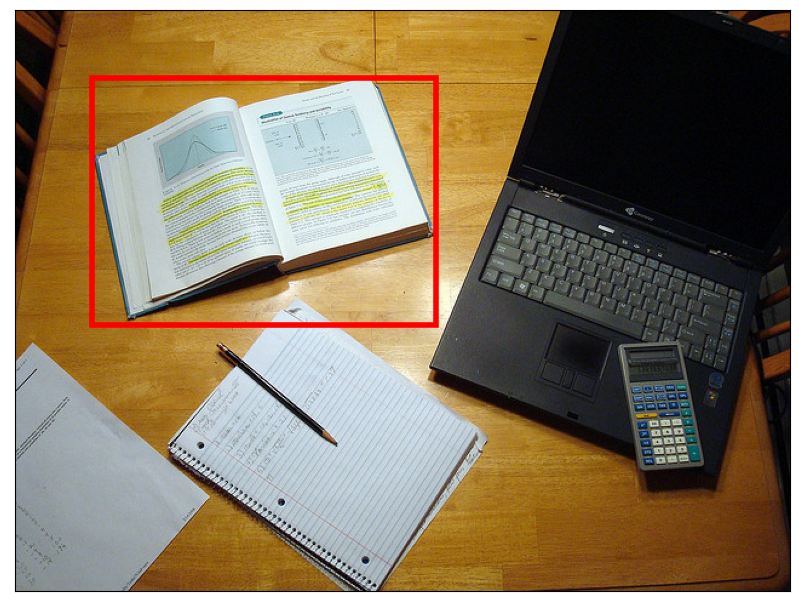

refcoco_testb_clpgpt_global_noise:0-0:        book on left (A)
refcoco_testb_clpgpt_global_noise:0-5:        keyboard on left (F)
refcoco_testb_clpgpt_global_noise:1-0:        left laptop (F)
------------------------------------------------------------
refcoco_testb_clpgpt_nocontext_noise:0-0:     left monitor (F)
refcoco_testb_clpgpt_nocontext_noise:0-5:     left monitor (F)
refcoco_testb_clpgpt_nocontext_noise:1-0:     top left donut (F)
------------------------------------------------------------
refcoco_testb_clpgpt_scene_noise:0-0:         left laptop (F)
refcoco_testb_clpgpt_scene_noise:0-5:         left laptop (F)
refcoco_testb_clpgpt_scene_noise:1-0:         left laptop (F)
------------------------------------------------------------
refcoco_testb_human_global_noise:0-0:         book (A)
------------------------------------------------------------
refcoco_testb_trf_global_noise:0-0:           top book (A)
refcoco_testb_trf_global_noise:0-5:           top laptop (F)
refcoco_test

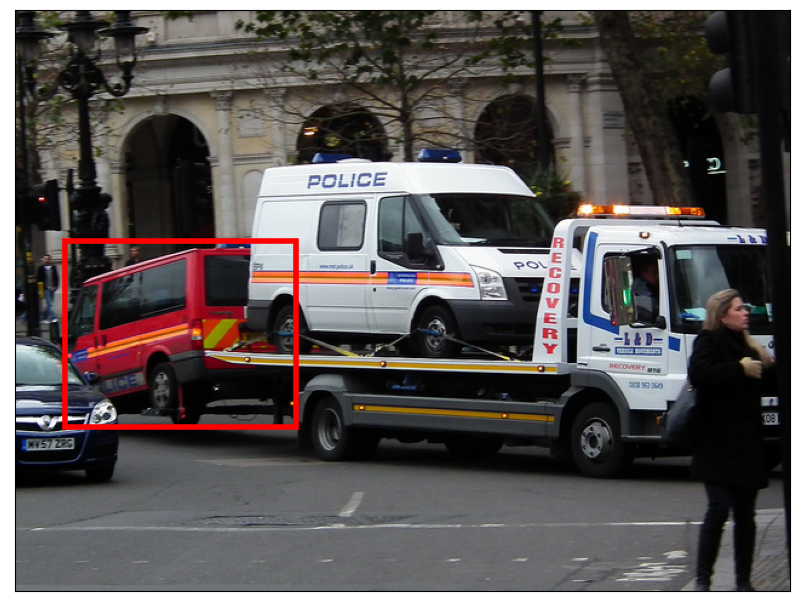

refcoco_testb_clpgpt_global_noise:0-0:        red truck (A)
refcoco_testb_clpgpt_global_noise:0-5:        red bus (A)
refcoco_testb_clpgpt_global_noise:1-0:        bus on left (A)
------------------------------------------------------------
refcoco_testb_clpgpt_nocontext_noise:0-0:     red car (A)
refcoco_testb_clpgpt_nocontext_noise:0-5:     red bus (A)
refcoco_testb_clpgpt_nocontext_noise:1-0:     left zebra (F)
------------------------------------------------------------
refcoco_testb_clpgpt_scene_noise:0-0:         red car (A)
refcoco_testb_clpgpt_scene_noise:0-5:         red car (A)
refcoco_testb_clpgpt_scene_noise:1-0:         white car (A)
------------------------------------------------------------
refcoco_testb_human_global_noise:0-0:         red van (A)
------------------------------------------------------------
refcoco_testb_trf_global_noise:0-0:           red truck (A)
refcoco_testb_trf_global_noise:0-5:           red truck (A)
refcoco_testb_trf_global_noise:1-0:          

In [8]:
for ann_id in ann_id_selection:
    
    print('ann_id:', ann_id)
    entry = refcoco_df.loc[refcoco_df.ann_id == ann_id].iloc[0]
    display_target(entry, coco_base=config.coco_dir, target_color='r', linewidth=4)

    for name, df in all_dfs.items():
        entry = df.loc[df.ann_id == ann_id].iloc[0]
        system_expression = entry.expression
        system_eval = entry.majority_annotation
        print(f'{name}:'.ljust(45), f'{system_expression}', f'({system_eval})')
        if '1-0' in name or 'human' in name:
            print('-'*60)
    
    print('#'*60)